# Initiation au Machine Learning avec Python - La pratique

Dans ce tutoriel en 2 parties nous vous proposons de découvrir les bases de l'apprentissage automatique et de vous y initier avec le langage Python. Cette seconde partie vous permet de passer enfin à la pratique avec le langage Python et la librairie Scikit-Learn !

### Tutoriel en 2 parties:

Initiation au machine learning avec Python - La theorie

Initiation au machine learning avec Python - La pratique

## Introduction à Scikit Learn

### Scikits-Learn est une librairie d'apprentissage automatique couvrant l'ensemble de la discipline:

Les types d'apprentissage : supervisé, non supervisé, par renforcement, par transfert
Les algorithmes :
* Linear Regression (régression linéaire),
* Logistic Regression (régression logistique),
* Decision Tree (arbre de décision),
* SVM (machines à vecteur de support),
* Naive Bayes (classification naïve bayésienne),
* KNN (Plus proches voisins),
* Dimensionality Reduction Algorithms,
* Gradient Boost & Adaboost,
* Réseaux de neuronnes

## Pourquoi débuter avec Scikit-Learn !!

#### C'est une bonne idée de débuter la découverte de l'apprentissage automatique avec cette librairie:

* Elle dispose d'une excellente documentation fournissant de nombreux exemples
* Elle dispose d'une API uniforme entre tous les algorithmes, ce qui fait qu'il est facile de basculer de l'un à l'autre
* Elle est très bien intégrée avec les Librairies Pandas et Seaborn
* Elle dispose d'une grande communauté et de plus de 800 contributeurs référencés sur GitHub !
* C'est un projet open source
* Son code est rapide, certaines parties sont implémentées en Cython

Ensuite, quand vous en aurez fait le tour, vous pourrez basculer vers d'autres librairies plus optimisées ou spécialisées sur une sujet précis (type d'apprentissage, algorithme, matériel, ...). Notre chapitre de présentation du Machine Learning propose déjà un bon panel des autres solutions à votre disposition...

#### Les concepts de la librairie
### Les données

Vos données sont représentées par des tableaux à 2 dimensions.
Typiquement, des tableaux Numpy ou Pandas ou Python
* Les lignes représentent les enregistrements
* Les colonnes les attributs (hauteur, longueur, couleur, autre information)
* Une donnée est un vecteur de paramètres, généralement des réels, mais les entiers, booléens et valeurs discrètes sont autorisées dans certains cas
* Les labels peuvent être de différents types, généralement des entiers ou chaînes
* Les labels sont contenus dans un tableau à une dimension, sauf rares cas où ils peuvent être dans le vecteur de paramètres

### Prédiction

L'algorithme de prédiction est représenté par une classe.

* Vous devez commencer par choisir l'algorithme à utiliser , que nous appelerons prédicteur/classifieur/estimator Les algorithmes sont des classes Python. Les données sont toujours des tableaux Numpy/Scipy/Pandas/Python
* Vous précisez ses éventuels paramètres, appelés hyperparamètres en instanciant la classe
* Vous l'alimentez avec la fonction fit dans le cas d'un apprentissage supervisé
* Vous lancez la prédiction sur un ensemble de valeurs via la fonction predict parfois appelée transform dans le cas de l'apprentissage non supervisé

## Découverte par la pratique - Classer une fleur selon des critères observables
Nous allons utiliser pour ce tutoriel la base de données d'Iris de la librairie scikit-learn

### Mais quel est donc cet Iris ?

Cet exemple est très souvent repris sur Internet. Nous ne dérogerons pas à la règle. Nous réaliserons cependant un cas d'utilisation plus complet que la plupart des exemples que vous pourrez trouver.

Cette base contient des Iris qu'un botaniste, Ronald Fisher, a classés en 1936 à l'aide d'une clef d'identification des plantes (type de pétales, sépale, type des feuilles, forme des feuilles, ...).

Puis, pour chaque fleur classée il a mesuré les longueurs et largeurs des sépales et pétales.

L'idée qui nous vient alors, consiste à demander à l'ordinateur de déterminer automatiquement l'espèce d'une nouvelle plante en fonction de la mesure des dimensions de ses sépales et pétales que nous aurions réalisée sur le terrain. Pour cela nous lui demanderons de construire sa décision à partir de la connaissance extraite des mesures réalisées par M. Fisher.

Autrement dit, nous allons donner à l'ordinateur un jeu de données déjà classées et lui demander de classer de nouvelles données à partir de celui-ci.

C'est un cas d'apprentissage supervisé (mais nous le transformerons aussi en non supervisé).

Une fois alimentés avec les observations connues, nos prédicteurs vont chercher à identifier des groupes parmi les plantes déjà connues et détermineront quel est le groupe duquel se rapproche le plus notre observation.

### Botanistes en herbe, à vos claviers !

Note pour les naturalistes amateurs:

Si vous aimez les clefs de détermination, une des plus connues est celle de M. Gaston Bonnier. Ses livres sont aujourd'hui dans le domaine public.

###  Chargement de la base

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

La variable iris est d'un type inhabituel, découvrons-le...

### Découverte du contenu de la base

In [2]:
print(type(iris)) # Ce n'est pas un DataFrame, mais une sorte de dictionnaire

<class 'sklearn.utils.Bunch'>


Rien de bien commun pour un Pythoniste...

Et que peut-on faire avec ?

In [3]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
iris.feature_names # Les noms des paramètres de nos donénes/enregistrements

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

L'attribut feature_names contient le nom des différents paramètres de nos données, il s'agit des longueurs et largeurs de pétales et sépales.

Un aperçu des 5 premiers enregistrements:

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

La liste des espèces connues, nos labels de classification, est contenue dans l'attribut target_names

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Création d'une variable target pour un accès plus facile à cet attribut:

In [7]:
target = iris.target # Les labels associés à chaque enregistrement
target               # target[0] est le label de iris['data'][0]
for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(target[ target == i]) ) )
#Les targets sont un tableau indiquant le numéro de l'espèce de chaque enregistrement:

classe : 0, nb exemplaires: 50
classe : 1, nb exemplaires: 50
classe : 2, nb exemplaires: 50


In [8]:
for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(target[ target == i]) ) )

classe : 0, nb exemplaires: 50
classe : 1, nb exemplaires: 50
classe : 2, nb exemplaires: 50


#### En résumé, l'échantillon de fleurs propose plusieurs informations:

* Les noms des données disponibles : feature_names

* Les mesures réalisées sur l'échantillon de fleurs connues et déjà classées : data

* Il s'agit de nos informations, des paramètres de nos vecteurs pour chaque fleur

* Le nom de chaque espèce : target_names

* Le classement de chaque enregistrement data dans son espèce: target

* Il s'agit de la classe de chaque fleur/vecteur

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Observation des données
Avant de commencer à classer ses données il est toujours bon de visualiser à quoi elles ressemblent et si d'éventuelles relations se dessinent.

In [10]:
data = iris.data # Pour un accès plus rapide
# tableau numpy de 2 dimensions de 150 enregistrements de 4 valeurs
type(data), data.ndim, data.shape

(numpy.ndarray, 2, (150, 4))

##### Nous avons donc 150 observations de 4 valeurs
Visualisons les !

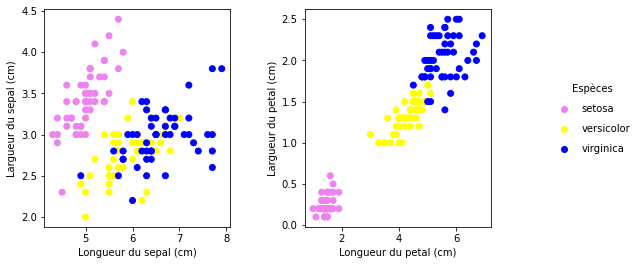

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(1,2,1)

clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in iris.target]

ax1.scatter(data[:, 0], data[:, 1], c=colors)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)')

ax2 = plt.subplot(1,2,2)

ax2.scatter(data[:, 2], data[:, 3], color=colors)

plt.xlabel('Longueur du petal (cm)')
plt.ylabel('Largueur du petal (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot();

### Observer avec Seaborn
C'est assez vite écrit et déjà fort parlant: la séparation des groupes entre les longueurs et largeurs de pétales semble très nette et déterminante !

Nous pourrions aussi le faire entre les longueurs de pétales et largeurs de sépales et inversement même si cela semble moins naturel.

##### La librairie Seaborn propose une matrice prête à l'emploi via le graphique Scatterplot Matrix pour réaliser ce type de graphique:

In [12]:
import seaborn as sns
import pandas as pd
sns.set()
df = pd.DataFrame(data, columns=iris['feature_names'] )
df['target'] = target
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


==> Il ne reste plus qu'à dessiner le graphique avec Seaborn...

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


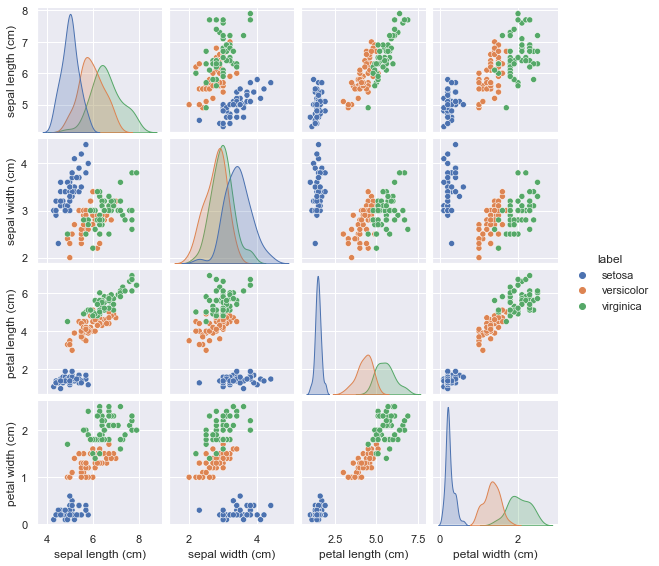

In [13]:
sns.pairplot(df, hue='label', vars=iris['feature_names'], size=2);

## Apprentissage
Nous pourrions ici utiliser plusieurs algorithmes.

Nous proposons de commencer par la classification Naive Bayes qui suppose que chaque classe est construite à partir d'une distribution Gaussiènne alignée.

Elle n'impose pas de définir d'hyperparamètres et est très rapide.

In [14]:
from sklearn.naive_bayes import GaussianNB

##### Création du classifieur

In [15]:
clf = GaussianNB()

##### Apprentissage

In [16]:
clf.fit(data, target) # On aurait aussi pu utiliser le dataframe df

GaussianNB()

In [17]:
GaussianNB(priors=None)

GaussianNB()

In [18]:
print(dir(clf))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_X', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_joint_log_likelihood', '_more_tags', '_partial_fit', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_update_mean_variance', '_validate_data', 'class_count_', 'class_prior_', 'classes_', 'epsilon_', 'fit', 'get_params', 'n_features_in_', 'partial_fit', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'score', 'set_params', 'sigma_', 'theta_', 'var_smoothing']


In [19]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Exécutons la prédiction sur les données d'apprentissage elles-mêmes

In [20]:
result = clf.predict(data)
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Qualité de la prédiction
Observons la qualité de la prédiction

In [21]:
result - target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

Là ou la prédiction est juste, la différence de result - target doit être égale à 0. Si la prédiction est parfaite nous aurons des zéros dans tout le tableau. Ce qui est à peine le cas.

Calculons le pourcentage d'erreur:

In [22]:
errors = sum(result != target) # 6 erreurs sur 150 mesures
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (150-errors)*100/150)   # 96 % de réussite

Nb erreurs: 6
Pourcentage de prédiction juste: 96.0


On aurait pu penser que les tableaux seraient parfaitement identiques, mais l'algorithme utilisé estime vraiment le label final en fonction des règles de probabilité qu'il a établies. Ces règles ne sont pas rigoureusement identiques à la réalité.

Cela prouve aussi que l'algorithme essaye de trouver un classement intelligent et ne se contente pas de comparer les valeurs d'origines aux valeurs entrantes.

Notre solution pour mesurer la qualité de la prédiction est très rudimentaire, Scikit-Learn propose des solutions plus abouties:

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(result, target) # 96% de réussite

0.96

Scikit-Learn permet aussi de calculer la matrice de confusion:

In [24]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(target, result)
conf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

Et Seaborn permet de la représenter avec le Heatmap

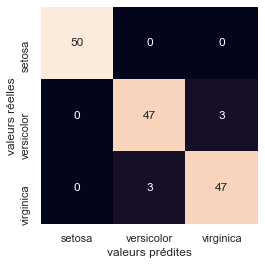

In [25]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

L'on observe ici que:

* L'espèce Setosa a été parfaitement identifiée
* 3 Virginica ont été confondues avec des Versicolor et inversemment
Ce n'est pas très surprenant les graphiques montrent une nette séparation des Setosa avec les 2 autres groupes qui sont nettement moins détachés.

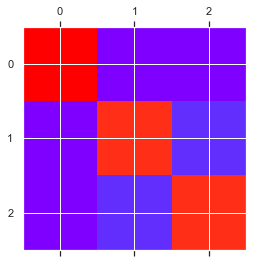

In [26]:
#  si vous n'avez pas seaborn, la fonction matshow de matplotlib peut vous aider
plt.matshow(conf, cmap='rainbow');

#### Séparation du jeu de tests et d'apprentissage
Nous ne disposons que d'un seul jeu de données connues.

Généralement l'on teste l'algorithme sur de nouvelles données, sinon les résultats sont forcément toujours très bons.

Nous pourrions choisir un enregistrement sur 2 comme ci-dessous:

In [27]:
data_test, target_test = data[::2], target[::2]
data_train, target_train = data[1::2], target[1::2]
target_test, target_train, len(target_test), len(target_train)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2]),
 75,
 75)

##### Mais ce n'est pas une très bonne méthode...

Dans cet exemple nous sélectionnons un enregistrement sur 2. Nous nous en sortons bien car toutes les fleurs sont regroupées par ordre de famille dans le tableau, mais si les setosa avaient été stockées 1 sur 2 elles auraient soit toutes été utilisées pour l'apprentissage et aucune n'aurait figuré dans le jeu de tests, ou inversement.

Le module model_selection de Scikit-Learn propose des fonctions pour séparer le jeu de données du jeu de tests qui sont attentives à ce type de petits problèmes:

In [28]:
# from sklearn.cross_validation import train_test_split # Version 0.17.1
from sklearn.model_selection import train_test_split # version 0.18.1
# split the data with 50% in each set
data_test = train_test_split(data, target
                                 , random_state=0
                                 , train_size=0.5)
data_train, data_test, target_train, target_test = data_test

La fonction train_test_split permet de décomposer le jeu de données en 2 groupes: les données pour l'apprentissage et les données pour les tests.

Le paramètre train_size indique la taille du jeu d'apprentissage qui sera utilisé: 50% des enregistrements.

In [29]:
data_test[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

Il ne reste plus qu'à relancer la classification:

In [30]:
clf = GaussianNB()
clf.fit(data_train, target_train)
result = clf.predict(data_test)

Puis de calculer de nouveau la qualité de la prédiction:

In [31]:
# Score
accuracy_score(result, target_test)

0.9466666666666667

Cela reste toujours très bon !

Affichons la matrice de confusion:

In [32]:
# Matrice de confusion
conf = confusion_matrix(target_test, result)
conf

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]], dtype=int64)

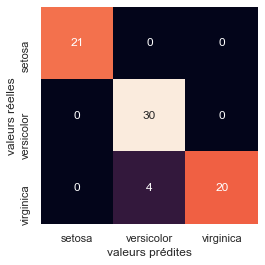

In [33]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

Sur les 75 plantes prédites, 4 Virginica ont été confondues avec des Versicolor

### Affichons les territoires de la classification
Notre prédicteur s'est "construit une image" de nos données.

Visualisons-là pour toutes les combinaisons de longueurs et largeurs de sépales connues.

L'idée est la suivante:

* Nous construisons un maillage de toutes les combinaisons possibles des longueurs et largeurs des sépales comprises entre leurs valeurs min/max
* Pour chaque couple de point (longueur, largeur) compris entre les min/max observés nous demandons de prédire l'espèce de la fleur
* Nous affichons sur la carte les prédictions réalisées (une couleur pour chaque point)

In [34]:
# On ne conserve que les longueurs/largeurs des sépales
data = iris.data[:, :2]
target = iris.target
data[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

Aperçu des données:

In [35]:
# On réapprend
clf = GaussianNB()
clf.fit(data, target)
h = .15
# Nous recherchons les valeurs min/max de longueurs/largeurs des sépales
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)

Le tableau x contient la liste des longueurs des sépales qui seront utilisées pour les tests de classification, comprises entre les min/max observés

In [36]:
print(x)

[3.3  3.45 3.6  3.75 3.9  4.05 4.2  4.35 4.5  4.65 4.8  4.95 5.1  5.25
 5.4  5.55 5.7  5.85 6.   6.15 6.3  6.45 6.6  6.75 6.9  7.05 7.2  7.35
 7.5  7.65 7.8  7.95 8.1  8.25 8.4  8.55 8.7  8.85]


Affichons les longueurs/largeurs min et max observées:

In [37]:
x_min, x_max, y_min, y_max

(3.3, 8.9, 1.0, 5.4)

Les longueurs varient entre 3.2 et 8.9 cm et 1.0 et 5.4 cm pour les largeurs.

Nous allons maintenant créer une matrice contenant toutes les points situés entre les valeurs minimales et maximales des longueurs et largeurs des sépales

La fonction meshgrid permet d'obtenir une grille de coordonnées pour les valeurs des points comprises entre x_min, x_max et y_min, y_max

In [38]:
xx, yy = np.meshgrid(x,y )

# http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# applatit les données du tableau
data_samples = list(zip(xx.ravel(), yy.ravel()) )

##### Explications

Le tableau xx contient les différentes longueurs répétées autant de fois que nous avons de mesures pour les largeurs:

In [39]:
print(xx) # Vecteur des valeurs de X répété autant de fois que l'on a
   # de valeurs différentes pour Y

[[3.3  3.45 3.6  ... 8.55 8.7  8.85]
 [3.3  3.45 3.6  ... 8.55 8.7  8.85]
 [3.3  3.45 3.6  ... 8.55 8.7  8.85]
 ...
 [3.3  3.45 3.6  ... 8.55 8.7  8.85]
 [3.3  3.45 3.6  ... 8.55 8.7  8.85]
 [3.3  3.45 3.6  ... 8.55 8.7  8.85]]


Inversement, le tableau yy, contient chaque largeur répétée autant de fois qu'il y a de mesures différentes des longueurs:

In [40]:
print(yy)

[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.15 1.15 1.15 ... 1.15 1.15 1.15]
 [1.3  1.3  1.3  ... 1.3  1.3  1.3 ]
 ...
 [5.05 5.05 5.05 ... 5.05 5.05 5.05]
 [5.2  5.2  5.2  ... 5.2  5.2  5.2 ]
 [5.35 5.35 5.35 ... 5.35 5.35 5.35]]


La fonction ravel applatit un tableau à n dimensions en 1 tableau d'une dimension:

In [41]:
a = [ [10, 20],
      [ 1,  2] ]
np.array(a).ravel()

array([10, 20,  1,  2])

La fonction zip génère quant-à-elle une liste de n-uplets constituée des éléments du même rang de chaque liste reçue en paramètre:

In [42]:
list(zip([10,20,30], [1,2,3]))

[(10, 1), (20, 2), (30, 3)]

Nous pouvons donc maintenant visualiser le contenu du jeu de données généré:

In [43]:
data_samples[:10]

[(3.3, 1.0),
 (3.4499999999999997, 1.0),
 (3.5999999999999996, 1.0),
 (3.7499999999999996, 1.0),
 (3.8999999999999995, 1.0),
 (4.049999999999999, 1.0),
 (4.199999999999999, 1.0),
 (4.35, 1.0),
 (4.499999999999999, 1.0),
 (4.649999999999999, 1.0)]

Ces couples de points ne sont autres que des mesures de fleurs imaginaires comprises entre les valeurs min/max connues.

Le but étant de déterminer leur espèce pour voir l'extension des territoires de chacune d'elle, telle que classée par l'ordinateur

Nous pouvons maintenant afficher les espèces telles que l'algorithme les évaluerait si nous les mesurerions dans la nature:

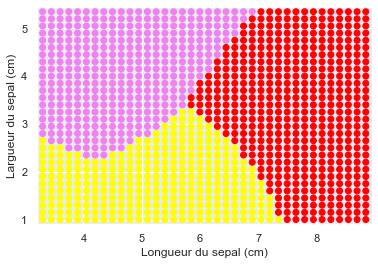

In [44]:
Z = clf.predict(data_samples)
#Z = Z.reshape(xx.shape)
plt.figure(1)
#plt.pcolormesh(xx, yy, Z) # Affiche les déductions en couleurs pour les couples x,y

# Plot also the training points
#plt.scatter(data[:, 0], data[:, 1], c=target)
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in Z]

plt.scatter(xx.ravel(), yy.ravel(), c=C)
plt.xlim(xx.min() - .1, xx.max() + .1)
plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

Cette image, n'est autre que votre clef de détermination: Imprimez-là et partez identifier les fleurs sur le terrain : mesurez les longueurs/largeurs de sépales, recherchez-les sur le graphique, la couleur du point vous donne l'espèce !

##### Magique non ?

Affichons le limites avec pcolormesh

<ipython-input-45-faf39075eec9>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y


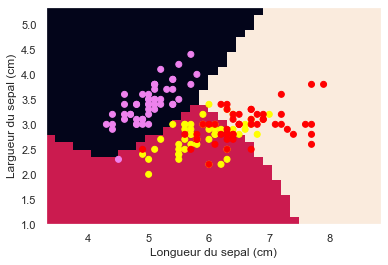

In [45]:
plt.figure(1)
plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y
# Plot also the training points
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in target]
plt.scatter(data[:, 0], data[:, 1], c=C)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

##### Complément
Essayons le même traitement en remplaçant GaussianNB par KN.

La classe à utiliser est

In [46]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()

Si vous travaillez dans un notebook Jupyter (fortement recommandé), utilisez le décorateur interact pour faire varier l'hyperparamètre N du nombre voisins

In [47]:
from ipywidgets import interact
@interact(n=(0,20))
def n_change(n=5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data, target)
    Z = clf.predict(data_samples)
    plt.figure(1)
    plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y
    # Plot also the training points
    colors = ['violet', 'yellow', 'red']
    C = [colors[x] for x in target]
    plt.scatter(data[:, 0], data[:, 1], c=C)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Longueur du sepal (cm)')
    plt.ylabel('Largueur du sepal (cm)');

interactive(children=(IntSlider(value=5, description='n', max=20), Output()), _dom_classes=('widget-interact',…

Calcul de la précision de la prédiction en fonction de N

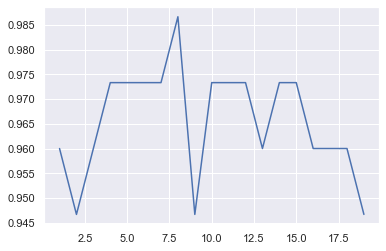

In [48]:
data_test, target_test = iris.data[::2], iris.target[::2]
data_train, target_train = iris.data[1::2], iris.target[1::2]
result = []
n_values = range(1,20)
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data_train, target_train)
    Z = clf.predict(data_test)
    score = accuracy_score(Z, target_test)
    result.append(score)

plt.plot(list(n_values), result)

Le graphique généré montre que la prédiction semble la meilleure pour N=8

Si vous souhaitez découvrir comment optimiser au mieux vos hyperparamètres, la fonction grid search vous simplifie énormément la recherche des hyperparamètres optimaux.

## Apprentissage non supervisé
Si nous supprimons l'information target nous tombons dans le cas d'algorithmes de clustering : nous pouvons toujours demander à ce que notre algorithme sépare nos données en 3 groupes sans connaissance de leurs véritables étiquettes.

Saura-t-il retrouver les groupes initiaux ?

#### Réduction de dimension
Dans le cas des algorithmes non supervisés il est très fréquent de disposer de très grandes quantités de paramètres. Ne sachant pas encore qui est responsable de quoi on a tendance à tout livrer à la machine.

Cela pose 2 problèmes:

* La visualisation des données, au delà de 3 paramètres notre cerveau est bien mal outillé pour se représenter les données
* La complexité des calculs, plus le nombre de paramètres est grand, plus nous aurons des calculs complexes et longs

Pour contourner ces problèmes il est courant de réduire la dimension du vecteur de données à quelque chose de plus simple. La difficulté est alors de réduire le nombre de paramètres tout en conservant l'essentiel de l'information, notamment les variations succeptibles de permettre le regroupement des données.

Plusieurs techniques de réduction sont disponibles avec Scikit-Learn.

Nous utiliserons pour cet exemple l'analyse en composante principale, dite PCA. Le module manifold propose aussi d'autres types d'algorithmes.

PCA est une technique linéaire de réduction de dimension qui a l'avantage d'être très rapide. Elle s'utilise simplement:

* Vous définissez le nombre de paramètres
* Vous alimentez l'algorithme avec les données à réduire
* Vous lancez la prédiction ici appelée réduction/transformation

In [49]:
from sklearn.decomposition import PCA
# Définition de l'hyperparamètre du nombre de composantes voulues
model = PCA(n_components=2)
# Alimentation du modèle
model.fit(iris.data)
# Transformation avec ses propres données
reduc = model.transform(iris.data )

Nous venons de réduire notre vecteur de 4 paramètres en 1 vecteur de 2 paramètres dont les variations sont censées être similaires.

Autrement dit nous devrions être capable de classer nos fleurs avec ces vecteurs réduits en ayant une qualité proche de celle utilisant les vecteurs originaux !

In [50]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Consultation des données originales:

Et de leur version réduite:

In [51]:
reduc[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [52]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Ajoutons les nouveaux paramètres dans le dataframe d'origine:

In [53]:
df['PCA1'] = reduc[:, 0]
df['PCA2'] = reduc[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,PCA1,PCA2
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755


Puis affichons les nouveaux couples de points (PCA1, PCA2) avec la couleur de l'espèce associée:

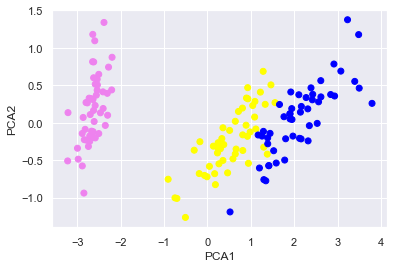

In [54]:
colors = ['violet', 'yellow', 'blue']
plt.scatter(df['PCA1'], df['PCA2'], c=[ colors[c] for c in df['target'] ]);
plt.xlabel('PCA1')
plt.ylabel('PCA2');

#Nous obtenons 3 groupes plutôt bien dissociés !

Ce qui peut aussi s'obtenir avec Seaborn

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


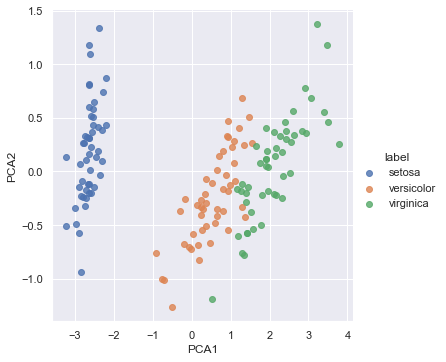

In [55]:
sns.lmplot("PCA1", "PCA2", hue='label', data=df, fit_reg=False);

Le résultat est plutôt satisfaisant, et ce qui est assez bluffant c'est que l'algorithme ne connaîssait pas du tout les types de fleurs !

Maintenant, ce nouveau classement peut-il permettre un bon regroupement des 3 espèces ? le graphique semble le confirmer, vérifions cela avec le clustering

#### Clustering
Il ne reste plus qu'à exécuter le regroupement. Plusieurs algorithmes existent:

* k-Means, qui se rapproche des plus proches voisins dans sa logique, recherche les données proches des centres des clusters. Il est très simple mais n'est vraiment efficace que sur des données organisées en cercles. ici nous avons plutôt des droites ou des ellipses
* GMM, Gaussian Mixture Models est plus complexe mais s'adapate très bien à différentes formes de clusters (groupes).
* Scikit Learn en propose beaucoup d'autres comme Spectral clustering, Mean Shift, Hierarchical clustering, ...

Nous utiliserons GMM pour cet exemple.

In [56]:
from sklearn.mixture import GaussianMixture
# Création du modèle avec 3 groupes de données
model = GaussianMixture (n_components=3, covariance_type='full')
# Apprentissage, il n'y en a pas vraiment
model.fit(df[['PCA1', 'PCA2']])
# Prédiction
groups = model.predict(df[['PCA1', 'PCA2']])

La prédiction étant faîte, pour chaque groupe généré nous affichons la couleur réelle des espèces, si le clustering a été efficace, il n'y aura qu'une seule couleur par groupe:

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


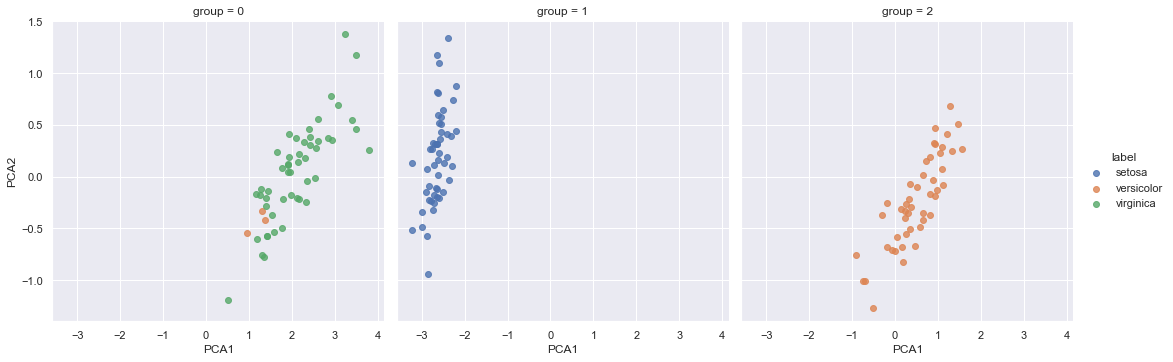

In [57]:
df['group'] = groups
sns.lmplot("PCA1", "PCA2", data=df, hue='label',
           col='group', fit_reg=False);

Le groupe setosa est très bien identifié, il y a toujours une imprécision entre les classes virginica et versicolor mais le résultat reste remarquable sur ce petit échantillon.

### Vue d'ensemble - The big picture
Pour vous aider à choisir vos algorithmes d'apprentissage automatique, nous reprenons cette image de Scikit-Learn qui pose assez bien la problématique:

#### Pour aller plus loin
Il est important de disposer de ressources pour s'essayer au machine learning

Le site Kaggle propose de nombreuses ressources (jeux de données et exemples) sur le machine learning.
Il propose aussi des compétions ou les membres peuvent comparer leurs algorithmes
Beaucoup de sites proposent des jeux de données:

Open data du gouvernement français
Enigma.io
Une recherche Internet sur Open data vous donnera beaucoup de ressources

## Conclusion
Nous voilà initiés au Machine Learning avec Scikit-Learn. La librairie propose de nombreux exemples et jeux de données. Elle est extrêmement riche et simple.

Les difficultés de cette discipline consistent à:

* comprendre les notions mathématiques derrière chaque algorithme pour avoir une idée de leurs limites
* choisir les hyperparamètres
* bien dimensionner ses jeux de données d'apprentissage

Ensuite, quelque soit votre algorithme c'est très simple:

* On instancie la classe et ses hyper-paramètres
* On fournit les données d'apprentissage à la méthode fit (si supervisé)
* On demande la détermination des données avec la méthode predict